Parte de este notebook está basado en https://github.com/theevann/webconf-pytorch-workshop



# Pytorch
Es una libreria python para computación científica, parecida a NumPy.
A diferencia de NumPy, Pytorch permite:
- Realizar cálculos en **GPUs**
- Proporciona herramientas para el cálculo de gradientes de forma sencilla.

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

###Tensores 
Pytorch funciona con tensores. 
Podéis ver un tensor como un array multidimensional.

In [ ]:
X = torch.tensor([3,3,3,4])
X

tensor([3, 3, 3, 4])

In [ ]:
X = torch.tensor(5) # También pueden ser números
X

tensor(5)

#### Pytorch ofrece diversos métodos para trabajar de forma fácil con tensores (similar a NumPy)

In [ ]:
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

In [ ]:
x = torch.Tensor([[0,1,2], 
                  [3,4,5]]).cpu()

print("x.shape: \n%s\n" % (x.shape,))
print("x.size(): \n%s\n" % (x.size(),))
print("x.size(1): \n%s\n" % x.size(1))
print("x.numel(): \n%s\n" % x.numel())
print("x.dtype: \n%s\n" % x.dtype)
print("x.device: \n%s\n" % x.device) # Vemos en que dispositivo está el tensor (CPU, GPUs, TPU)
if torch.cuda.is_available(): #Si hay gpus disponibles
    cuda_0 = torch.device('cuda:0') # EScogemos la primera GPU
    x = x.to(cuda_0) # Pasamos el tensor a la gpu
    print("x.device: \n%s\n" % x.device) # Vemos en que dispositivo está el tensor (CPU, GPUs, TPU)

x.shape: 
torch.Size([2, 3])

x.size(): 
torch.Size([2, 3])

x.size(1): 
3

x.numel(): 
6

x.dtype: 
torch.float32

x.device: 
cpu

x.device: 
cuda:0



#### Más operaciones

In [ ]:
X = torch.rand(3, 2)
torch.sqrt(X)

tensor([[0.8213, 0.2083],
        [0.8068, 0.1999],
        [0.5805, 0.6118]])

In [ ]:
X = torch.eye(4) + torch.arange(4).repeat(4, 1).float()
print(X)
torch.norm(X)

tensor([[1., 1., 2., 3.],
        [0., 2., 2., 3.],
        [0., 1., 3., 3.],
        [0., 1., 2., 4.]])


tensor(8.4853)

#### También podemos realizar operaciones que modifiquen el propio tensor

In [ ]:
X = torch.rand(3, 2)
X += 1
X

tensor([[1.9764, 1.1752],
        [1.5046, 1.1422],
        [1.5561, 1.7678]])

In [ ]:
X.uniform_() # Valores aleatorios entre [0,1]

tensor([[0.9621, 0.2622],
        [0.5830, 0.4775],
        [0.7826, 0.1304]])

#### ¿CPU o GPU?

In [ ]:
A = torch.rand(100, 1000, 1000)
B = A.cuda()
A.size()

torch.Size([100, 1000, 1000])

In [ ]:
_ = torch.bmm(A, A) # bmm realiza una multiplicación de matrices (batch matrix multiplication)
# 2.76 s

In [ ]:
_ = torch.bmm(B, B)
# 17.4 µs

Aunque hay que tener en cuenta el tiempo de carga en la GPU y la memoria usada.

# Cálculo del gradiente

El cálculo del gradiente en PyTorch es muy sencillo. 

Básicamente, llamando a la función .backward() realiza todo el cálculo de forma automática.


Derivemos la función: $f(x) = 10 x^5 + 1$. El resultado de la derivada $\frac{df(x)}{dx}$ es ${50 x^4}$ y en PyTorch podemos hacerlo así:

In [ ]:
# Creamos un tensor
x = torch.tensor(2.0, requires_grad=True)
print("x = {}".format(x))

# definimos f(x)
y = 10 * x**5  + 1
print("Nuestro cálculo {}".format(50 * x**4))

# Calculamos el gradiente de y wrt a todas las variables que tienen el atributo 'requires_grad' marcado (por defecto = True)
y.backward()
computed_gradient = x.grad
print("Cálculo del gradiente por PyTorch {}".format(computed_gradient))

x = 2.0
Nuestro cálculo 800.0
Cálculo del gradiente por PyTorch 800.0


Aunque este es un ejemplo sencillo, podemos poner la función que queramos. 
Por ejemplo, una red neuronal.

#### Limpiar el gradiente

Pytorch va a guardar el gradiente en el tensor hasta que no lo "limpiemos".
Si no le decimos que lo puede borrar, no lo hará. Esto hara que se acumule el gradiente. 

Vemos un ejemplo y como corregirlo (Aunque más adelante veremos como hacerlo de forma automática):

In [ ]:
# Initialize x with some value
x = torch.tensor(2.0, requires_grad=True)
y = 10 * x**5  + 1

y.backward()
print("Gradiente: {}".format(x.grad))

y = 10 * x**5  + 1 
y.backward()
print("Gradiente {} !!!!!!!!".format(x.grad))

x.grad = None # Solución a la acumulación
y = 10 * x**5  + 1
y.backward()
print("Gradiente {} ".format(x.grad))

Gradiente: 800.0
Gradiente 1600.0 !!!!!!!!
Gradiente 800.0 


### Optimización


### Optimizadores
PyTorch ofrece diferentes algoritmos de optimización con diferentes clases.
Estos automáticamente recorren todos los parámetros del modelo y aplican el paso para actualizar los pesos.

Recordad que el paso para optimizar los parámetros es:
$$x_{t+1} = x_{t} - \rho \nabla_x f (x_t)$$

Todos los optimizadores están en el paquete `torch.optim`.

Al usar los optimizadores tenemos que preocuparnos principalmente de dos funciones:
- `optimizer.step()`: Actualiza los pesos del modelo.
- `optimizer.zero_grad()`: Establece todos los gradientes de los parámetros a 0, evitando que se acumulen.


In [ ]:
import torch.optim as optim


In [ ]:
parameters = [x]  # This should be the list of model parameters

optimizer = optim.SGD(parameters, lr=0.01, momentum=0.9) # Este optimizador corresponde con mini-batch gradient descent 
# explicado en clase. 
# Además, podemos añadir momentum.

# Otros optimizadores. Cada uno tiene su referencia en la libreria. consultar para ver detalles en https://pytorch.org/docs/stable/index.html
optimizer = optim.Adadelta(parameters, lr=0.01)
optimizer = optim.Adagrad(parameters, lr=0.01)
optimizer = optim.RMSprop(parameters, lr=0.01)
optimizer = optim.Adam(parameters, lr=0.01)

In [ ]:
# Schedulers
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)

#https://pytorch.org/docs/stable/optim.html


### Módulos

Los módulos son una forma de re-usar componentes y manejar sus parámetros. 
PyTorch ofrece tiene muchos módulos con operaciones comunes, tales como redes recurrentes, convolucionales, funciones de activación, etc.

Además, los módulos ayudan a:
- Mantener un seguimiento de los parámetros del modelo
- Guardar y/o cargar los parámetros de un modelo
- Mover todos los parámetros entre diferentes dispositivos (cpu, gpus...)

*Los parámetros (torch.nn.Parameter) son tensores con `requires_grad=True`, los cuales son añadidos a la lista de parámetros cuando se usa el modelo*

In [ ]:
# en el paquete nn de torch están todas las capas de redes neuronales (neural networks). 
# Linear es una capa lineal (Wx+B), la cual tiene dos parámetros: la matriz W y el vector B (umbral o bias).
module = torch.nn.Linear(5, 2) 
print("weight:", module.weight)
print("\nbias:", module.bias)

weight: Parameter containing:
tensor([[ 0.3407, -0.3952,  0.2465, -0.0207,  0.4246],
        [-0.2835, -0.1029, -0.3080,  0.1001, -0.2225]], requires_grad=True)

bias: Parameter containing:
tensor([-0.2074,  0.1088], requires_grad=True)


La línea torch.nn.Linear(5, 2)  equivale a añadir una capa en un Multilayer Perceptron, donde la entrada son 5 neuronas y de salida otras dos. 
Esto equivale a 5*2+2 = 12 parámtros entrenables.

Cada instancia del modelo tiene sus propios parámetros.
Estos parámetros son inicializados aleatoriamente cuando se instancian.
Podemos obtener la lista de parámetros de todo el módulo de la siguiente forma:



In [ ]:
for param in module.parameters():
    print("\n", param)


 Parameter containing:
tensor([[ 0.3407, -0.3952,  0.2465, -0.0207,  0.4246],
        [-0.2835, -0.1029, -0.3080,  0.1001, -0.2225]], requires_grad=True)

 Parameter containing:
tensor([-0.2074,  0.1088], requires_grad=True)


### Trabajando con mini-batches

Un mini-batch es un conjunto de muestras agrupadas. 
Esto está conectado con el algoritmo incremental y batch.
Trabajar con batches nos permite acelerar e incrementar la eficiencia de nuestros modelos. Esto es porque trabajaremos con esas muestras "batcheadas" en paralelo.
Si trabajamos con 5 características de entrada, la forma del tensor será (batch_size, 5), siendo batch el número de muestras en paralelo.
Si, por ejemplo, trabajamos con imágenes RGB a 1024x768 de resolución, el tensor sería (batch_size, 3, 1024, 768), siendo batch siempre el número entero de muestras que verá el modelo al mismo tiempo.


### Forward

Para ejecutar el modelo y hacer el forward pass, basta con usar el modelo creado anteriormente junto con la entrada como si fuera una función.
Esto ejecutará el método `forward()`

In [ ]:
batch_size = 2
feature_size = 5

x = torch.randn(batch_size, feature_size)
print("x = {}".format(x))
print("x = {} batch_size {}\n".format(x.shape, batch_size))

predicted_y = module(x)
print("\n\n----------- \n\n")
print(f'Predicho por el modelo : {predicted_y} \nshape {predicted_y.shape}')

x = tensor([[ 0.6711,  0.7868,  0.4032, -0.1430, -1.5304],
        [-1.2370,  1.5045,  1.0770, -0.0871,  2.5257]])
x = torch.Size([2, 5]) batch_size 2



----------- 


Predicho por el modelo : tensor([[-0.8371,  0.0396],
        [ 0.1162, -0.5978]], grad_fn=<AddmmBackward0>) 
shape torch.Size([2, 2])


### Módulos personalizados

Para crear nuestros propios módulos debemos crear una clase y heredar de `torch.nn.Module`. Seguidamente, debemos sobreescribir dos métodos:

- El método **`__init__`**, donde primero llamaremos al método de la clase padre **`super().__init__()`**. Dentro de **`__init__`** crearemos todos los subcomponentes que se pueda aprender, tales como capas Lineales, convolucionales o cualquier otro parámetro. El orden en el que se crean no es importante.

- El método **`forward`** es el método que definirá que y cómo se ejecutará todo lo que hemos definido en el método constructor anteriormente explicado.

In [ ]:
class MiModulo(torch.nn.Module):
    def __init__(self, tamanyo_entrada, num_neuronas, num_clases):
        super().__init__()
        self.capa_entrada = torch.nn.Linear(tamanyo_entrada, num_neuronas)
        self.relu = torch.nn.ReLU()
        self.capa_salida = torch.nn.Linear(num_neuronas, num_clases)
    
    def forward(self, x):
        salida = self.capa_entrada(x)
        salida_relu = self.relu(salida)
        resultado = self.capa_salida(salida_relu)
        return resultado

In [ ]:

model = MiModulo(tamanyo_entrada=20, num_neuronas=10, num_clases=5)
print(model)

MiModulo(
  (capa_entrada): Linear(in_features=20, out_features=10, bias=True)
  (relu): ReLU()
  (capa_salida): Linear(in_features=10, out_features=5, bias=True)
)


# Construyendo y entrenando una red neuronal - MLP



Vamos a usar el dataset MNIST para clasificar digitos manuscritos. Este es un dataset muy sencillo y conocido. Éste consiste en 60.000 imágenes de tamaño 28x28 para entrenamiento y otras 10.000 para evaluar la calidad del modelo entrenado (test).

![](https://www.prhlt.upv.es/~jprieto/APR/figures/mnist.jpeg)


## Cargando el dataset
Lo podremos encontrar en la libreria `torchvision`
Con la variable `train=True` escogemos, o no, la partición de entrenamiento o evaluación.
Además, le indicamos que se descargue el corpus y, con la línea `transform=torchvision.transforms.ToTensor()` indicamos que pase, automáticamente, las imágenes a Tensores.  

In [ ]:
import torchvision

# MNIST Dataset (Images and Labels)
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



A la hora de entrenar el modelo pasaremos los datos por dicho modelo varias veces. Cada vez que pasemos un conjunto de datos (batch) por el modelo le llamaremos iteración, o **forward pass**.
Cada vez que pasemos todos los datos por el modelo le llamaremos **epoch**
Normalmente, entre cada epoch los datos son aleatorizados y "batcheados" otra vez. 
Es decir, una vez que el modelo ha visto todos los datos de entrenamiento se vuelven a desordenar y a crear los conjuntos de datos para volverlos a usar en la siguiente epoch.

Para todo esto, PyTorch nos ofrece la clase **DataLoader**, la cual hará que no nos tengamos que preocupar prácticamente por nada de esto, incluyendo soporte multi-hilos para optimizar la carga.

In [ ]:
# Dataset Loader (Input Batcher)
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) # En train desordenamos los datos
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) #En test no hace falta. El modelo solo debería ver estos datos una sola vez, cuando ya ha acabado de entrenar

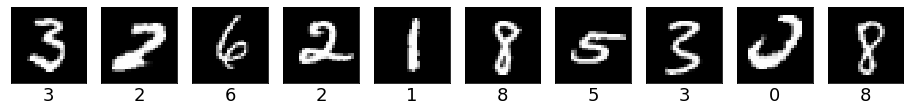

In [ ]:
#Podemos ver algunas imágenes
plt.figure(figsize=(16,9))
data, target = next(iter(train_loader))
for i in range(10):
    img = data.squeeze(1)[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap="gray", interpolation="none")
    plt.xlabel(target[i].item(), fontsize=18)
    plt.xticks([])
    plt.yticks([])

## Definiendo un modelo

Un perceptron multicapa (multilayer perceptron o MLP) consiste en una serie de capas de neuronas conectadas de forma lineal.
La primera capa tiene como entrada el número de características de entrada al modelo. En este caso, el número de píxeles: 28x28=784.
La última capa contiene la predicción, que dependerá del número de clases. En este caso serán los distintos números del 0 al 9 (10 clases).


![](https://raw.githubusercontent.com/ledell/sldm4-h2o/master/mlp_network.png)

Para poder aproximar funciones no lineales, la salida de las neuronas es transformada usando una función de activación $\sigma(\cdot)$, antes de entrar en la siguiente capa.

La neurona $\vec x_{i+1}$ en la capa $i+1$ es calculada a partir de la neurona $\vec x_i$ de la capa $i$ como:

$$ \vec x_{i+1} = \sigma\left(\theta_{i+1} \vec s_i + \vec b_{i+1} \right) $$

donde $\theta_{i+1}$ son los parámetros entre cada par entrada/salida de las neuronas en la capa $i+1$, y $\vec b_{i+1}$ contiene el término independiente (umbral).

Las funciones de activación pueden encontrarse en el paquete `torch.nn.functional`, tales como `torch.nn.functional.ReLU` y `torch.nn.functional.Sigmoid`

Vamos a definir un modelo sencillo:

- Entrada: 784
- Primera capa oculta: 128
- Segunda capa oculta: 64
- Capa de salida: 10

Usaremos ReLU como función de activación, excepto en la última capa.

In [ ]:
import torch.nn.functional as F  

class MyMLP(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        
        self.input_size = input_size
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(input_size, 128)
        self.linear_2 = torch.nn.Linear(128, 64)
        self.linear_3 = torch.nn.Linear(64, num_classes)
        
    
    def forward(self, x):
        out = F.relu(self.linear_1(x))
        out = F.relu(self.linear_2(out))
        out = self.linear_3(out)
        return out

In [ ]:
model = MyMLP(input_size=28 * 28, num_classes=10)
model

MyMLP(
  (linear_1): Linear(in_features=784, out_features=128, bias=True)
  (linear_2): Linear(in_features=128, out_features=64, bias=True)
  (linear_3): Linear(in_features=64, out_features=10, bias=True)
)

##Entrenando el modelo

Para entrenar seguiremos, normalmente, los siguientes pasos:
- Recorrer todos los datos en forma de batch
- Hacer el forward pass para obtener una predicción
- *Limpiar los gradientes anteriormente calculados*
- Hacer el backward pass para calcular los gradientes
- Actualizar los parámetros utilizando un optimizador

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Usamos la gpu si está disponible


# Copiamos todos los datos al dispositivo que queremos usar
model.to(device)


# Definimos la función de pérdida que usaremos. En este caso Cross Entropy
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)  # Utilizamos un optimizador. 

# En cada epoch pasamos por todos los datos de train
for epoch in range(5):
    total_loss = 0.0
    
    # Un bucle para pasar por cada batch
    for (inputs, labels) in train_loader:
        
        # Movemos los datos al dispositivo (GPU o CPU)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Como el modelo se espera un vector de 768 unidades, 
        # vamos a cambiar la forma del tensor para que, 
        # en lugar de ser (batch, 28,28) sea de (bath,768)
        # el -1 indica que esa dimensión se rellene "con lo que queda".
        # En este caso, -1 calcula "dinámicamente" el batch
        inputs = inputs.view(-1, 28*28)

        outputs = model(inputs) # forward pass
        loss = criterion(outputs, labels) # Calculamos la pérdida
        loss.backward() # Calculamos el gradiente
        optimizer.step() # Actualizamos los pesos
        optimizer.zero_grad() # Borramos el gradiente

        # Mantenemos un total del recuento de la pérdida en cada epoch
        total_loss += loss.item()
        
    print("Epoch %d, Loss=%.4f" % (epoch+1, total_loss/len(train_loader)))

Epoch 1, Loss=2.3018
Epoch 2, Loss=2.2860
Epoch 3, Loss=2.2664
Epoch 4, Loss=2.2410
Epoch 5, Loss=2.2073


### ¿Que tan bien va el modelo?
Vamos a calcular los aciertos del modelo en los dos conjuntos de datos: el que se ha visto entrenando y el que no.

In [ ]:
def accuracy(model, data_loader, device):
    with torch.no_grad(): # Dado que calculando los aciertos no necesitamos calcular gradientes, deshabilitamos la opción para ocupar menos memoria y cómputo.
        correct = 0
        total = 0
        for inputs, labels in data_loader:
            inputs = inputs.to(device)     
            inputs = inputs.view(-1, 28*28)
            
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            
            correct += (predicted.cpu() == labels).sum().item()
            total += labels.size(0)
            
    acc = correct / total
    return acc

In [ ]:
accuracy(model, train_loader, device)  # look at: accuracy(model, train_loader, device)

0.4796666666666667

In [ ]:
accuracy(model, test_loader, device)  # look at: accuracy(model, train_loader, device)

0.487

#Redes neuronales convolucionales (CNN)

##Convolución
Una convolución es una operación entre dos señales.
En visión por computador una es la entrada (imagen, audio, texto...) y la otra suele ser un filtro o `kernel`.

Par obtener el resultado de una convolución entre la entrada y el kernel, los pasos son:
- Deslizar el kernel a través del vector de entrada dando `n` saltos entre cada paso (stride). Por ejemplo, moviendo una posición el kernel en cada paso.
- En cada paso realizar una multiplicación punto a punto entre el kernel y las posiciones correspondientes en la entrada en ese paso.
- Sumar el resultado de todas las multiplicaciones.

`Animaciones extraidas de: https://github.com/theevann/webconf-pytorch-workshop/tree/master/figures`

In [ ]:
! pip -q install colorama
import sys
import colorama
from collections import OrderedDict
from matplotlib import pyplot as plt 
import torch.optim as optim

torch.set_printoptions(precision=3)

#### Convolución paso a paso


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-02.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-03.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-04.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-05.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-06.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-07.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-08.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-09.gif)

![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv1d/frame-10.gif)

#### GIF



![](https://raw.githubusercontent.com/theevann/webconf-pytorch-workshop/master/figures/conv-1d.gif)

#### Calcular el tamaño de salida

En el ejemplo anterior hemos vemos que el vector de salida de la convolución es $W- w + 1$, siendo $W$ el tamaño del vector de entrada y $w$ el tamaño del kernel.

No obstante, hay dos variables más a tener en cuenta:
- Stride: son los "saltos" que daremos al mover el kernel. En el ejemplo el stride es igual a 1.
- Padding: A veces nos conviene rellenar el vector por ambos lados, ya sean con 0s o el valor que sea deseado. Esto nos puede servir para usar un kernel más grande o, simplemente, modificar el tamaño del vector resultante al deseado.


Para calcular el tamaño del resultado utilizando también padding y stride se utilizará el cálculo $[(W−w+2p)/s]+1$, donde $W$ y $w$ son los tamaños del vector de entrada y el kernel, respectivamente, y $p$ y $s$ serán el padding y el stride respectivamente.
En el ejemplo mostrado el padding es igual a 0.



#### Convolución 1d PyTorch

En PyTorch podemos usar la función conv1d

In [ ]:
input = torch.Tensor([1,4,-1,0,2,-2,1,3,3,1]).view(1,1,-1)  # Size: (Batch size, Num Channels, Input size)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)  # Size: (Num output channels, Num input channels, Kernel size)
torch.nn.functional.conv1d(input, kernel)

tensor([[[ 9.,  0.,  1.,  3., -5., -3.,  6.]]])

In [ ]:


input = torch.Tensor([1,4,-1,0,]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
a = torch.nn.functional.conv1d(input, kernel)
print(a)

input = torch.Tensor([-1,0,2,-2]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
b = torch.nn.functional.conv1d(input, kernel)
print(b)

input = torch.Tensor([0,2,-2,1]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
c = torch.nn.functional.conv1d(input, kernel)
print(c)

input = torch.Tensor([2,-2,1,3]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
d = torch.nn.functional.conv1d(input, kernel)
print(d)

input = torch.Tensor([-2,1,3,3]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
e = torch.nn.functional.conv1d(input, kernel)
print(e)

input = torch.Tensor([1,3,3,1]).view(1,1,-1)
kernel = torch.Tensor([1,2,0,-1]).view(1,1,-1)
f = torch.nn.functional.conv1d(input, kernel)
print(f)


tensor([[[9.]]])
tensor([[[1.]]])
tensor([[[3.]]])
tensor([[[-5.]]])
tensor([[[-3.]]])
tensor([[[6.]]])


## Convolución 2d
La extensión de convolución 2d es similar a la 1d, pero aumentando la dimensionalidad.
En PyTorch podemos usar la función convdd

#### Conv2d paso a paso


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-1.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-2.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-3.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-4.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-5.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-6.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-7.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-8.gif)


![](https://www.prhlt.upv.es/~jprieto/APR/figures/conv2d/frame-9.gif)

#### Conv2d GIF

![convolution 2d](https://raw.githubusercontent.com/theevann/webconf-pytorch-workshop/master/figures/conv-2ds.gif)

#### Código

In [ ]:
# Input Size: (Batch size, Num channels, Input height, Input width)
input = torch.Tensor([[3,3,2,1,0], 
                      [0,0,1,3,1], 
                      [3,1,2,2,3], 
                      [2,0,0,2,2], 
                      [2,0,0,0,1]]).view(1,1,5,5)

# Kernel Size: (Num output channels, Num input channels, Kernel height, Kernel width)
kernel = torch.Tensor([[0,1,2],
                       [2,2,0],
                       [0,1,2]]).view(1,1,3,3)

torch.nn.functional.conv2d(input, kernel)

tensor([[[[12., 12., 17.],
          [10., 17., 19.],
          [ 9.,  6., 14.]]]])

#### Conv2d con múltiplos kernels

Para trabajar con múltiples canales (una imagen RGB, por ejemplo), haremos exactamente lo mismo solo que se aplicará la convolución con su kernel, por separado, a cada canal y después se sumará.

<img src="https://raw.githubusercontent.com/theevann/webconf-pytorch-workshop/master/figures/conv-2d-in-channels.gif" alt="drawing" width="900"/>

Es normal usar diferentes kernels para la misma entrada. 
Dado que cada kernel se inicializará con valores aleatorios, cada uno aprenderá un patrón distinto.
El número de canales de salida corresponde con el número de kernels que usamos.
Si usamos 6 kernels, podremos pasar de una imagen de 3 canales a otra de 6 canales, por ejemplo.

#### Conv2d con múltiplos kernels


<img src="https://raw.githubusercontent.com/theevann/webconf-pytorch-workshop/master/figures/conv-2d-out-channels.gif" alt="drawing" width="400"/>

## Ejemplos de kernels, ya calculados


#### Gradiente de una imagen
Para medir como cambia una imagen en términos de color o intensidad se utiliza el gradiente de esta. La riección del gradiente indicará la dirección en la que la imagen está cambiando más rápidamente, mientras que la magnitud del gradiente nos indica la rapidez con la que la imagen está cambiando.
Esto se calcula por las derivadas parciales de una función dada (la imagen, utilizando su intensidad) a lo largo de las direcciones X e Y.
Encontraremos cambios de intensidad grandes donde la derivada sea máxima o supere cierto umbral. Normalmente, nos permitirán encontrar cietros patrones, bordes, etc.

--2021-11-16 14:37:54--  https://www.prhlt.upv.es/~jprieto/APR/figures/lena.png
Resolving www.prhlt.upv.es (www.prhlt.upv.es)... 158.42.161.44
Connecting to www.prhlt.upv.es (www.prhlt.upv.es)|158.42.161.44|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K   337KB/s    in 1.4s    

2021-11-16 14:37:57 (337 KB/s) - ‘lena.png’ saved [473831/473831]

(512, 512)


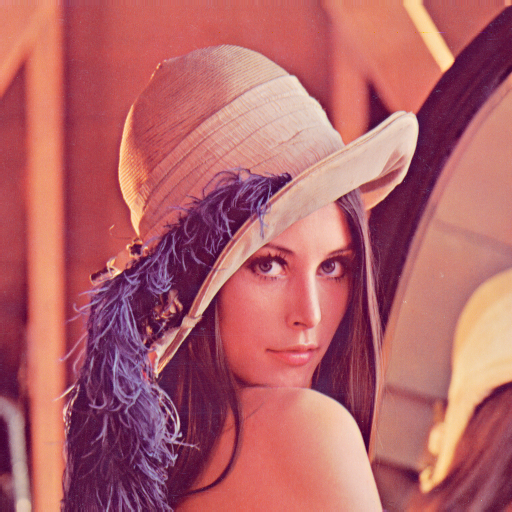

In [ ]:
from PIL import Image

! wget --no-check-certificate https://www.prhlt.upv.es/~jprieto/APR/figures/lena.png
image = Image.open("lena.png")
print(image.size)
image

Con el siguiente kernel/filtro podremos detectar bordes:

$$\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 
\end{bmatrix}
$$

Vamos a modificar la imagen y el kernel para que tengan las siguientes dimensiones:
- Imagen: **Batch size** x **Num channels** x **Input height** x **Input width**
- Kernel : **Num output channels** x **Num input channels** x **Kernel height** x **Kernel width**

Dado que es solo un kernel, la salida será de solo un canal,
y dado que tenemos una sola imagen, el batch size será de 1.

torch.Size([1, 3, 3, 3])


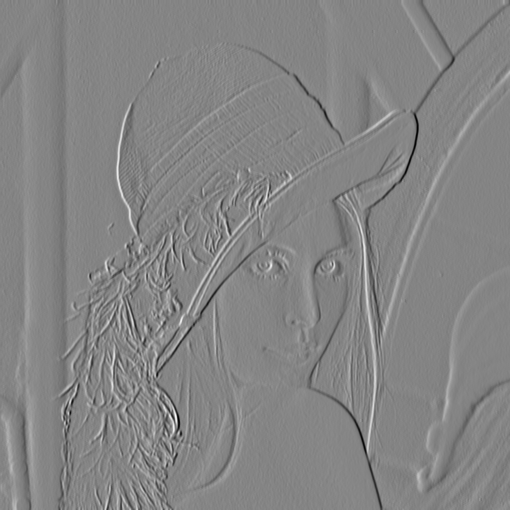

In [ ]:
from torchvision.transforms.functional import to_tensor, to_pil_image

image_tensor = to_tensor(image)
input = image_tensor.unsqueeze(0)
kernel = torch.Tensor([-1,0,1]).expand(1,3,3,3)
print(kernel.shape) # batch. nchanels, w, h
# kernel = torch.Tensor([[[[-1,0,1], [-1,0,1], [-1,0,1]], [[-1,0,1], [-1,0,1], [-1,0,1]], [[-1,0,1], [-1,0,1], [-1,0,1]]]])

out =  torch.nn.functional.conv2d(input, kernel)
norm_out = (out - out.min()) / (out.max() - out.min())  # Map output to [0,1] for visualisation purposes
to_pil_image(norm_out.squeeze())

#### Otros filtros

$$\begin{bmatrix}
-1 & -1 & -1 \\
 0 &  0 & 0 \\
 1 &  1 & 1 
\end{bmatrix}
$$

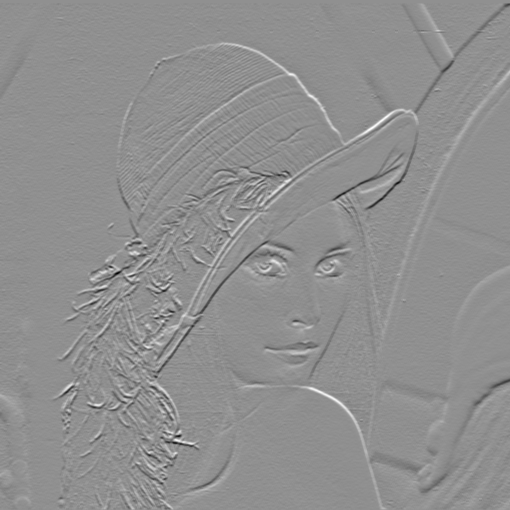

In [ ]:
kernel = torch.Tensor([[-1, -1, -1], [0,0,0], [1, 1, 1]])
kernel = kernel.expand(1, 3, 3, 3)

out =  torch.nn.functional.conv2d(input, kernel)
norm_out = (out - out.min()) / (out.max() - out.min())  # Map output to [0,1] for visualisation purposes
to_pil_image(norm_out.squeeze())


$$\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 &  1 & 0 
\end{bmatrix}
$$

torch.Size([3, 3])
torch.Size([1, 3, 3, 3])


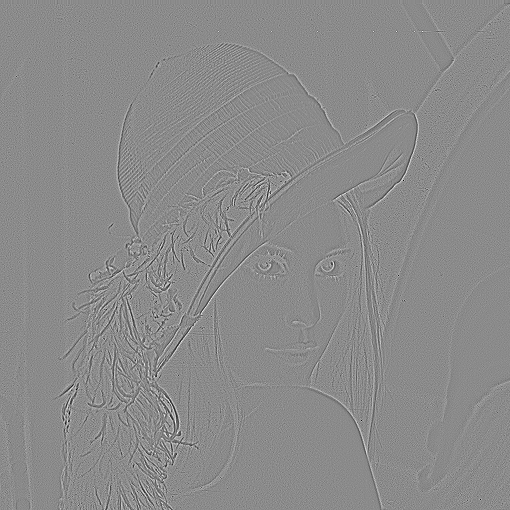

In [ ]:
kernel = torch.Tensor([[0, 1, 0], [1,-4,1], [0, 1, 0]])
print(kernel.shape)
kernel = kernel.expand(1, 3, 3, 3)
print(kernel.shape)

out =  torch.nn.functional.conv2d(input, kernel)
norm_out = (out - out.min()) / (out.max() - out.min())  # Map output to [0,1] for visualisation purposes
to_pil_image(norm_out.squeeze())

## nn.Module

Una CNN puede aprender todos estos kernels gracias al descenso por gradiente.
Para crear una CNN usaremos las convoluciones del paquete `nn`.


In [ ]:
from torch import nn
conv_1 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=(3,3))

print("Convolution", conv_1)
print("Kernel size: ", conv_1.weight.shape) # First two dimensions are: Num output channels and Num input channels

# Fake 5x5 input with 3 channels
input = torch.randn(1, 3, 5, 5)  # batch_size, num_channels, height, width

out = conv_1(input)
print(out)
print(out.shape)

Convolution Conv2d(3, 2, kernel_size=(3, 3), stride=(1, 1))
Kernel size:  torch.Size([2, 3, 3, 3])
tensor([[[[-0.310, -0.314,  0.163],
          [ 0.478, -0.892,  1.291],
          [ 1.144, -0.260,  0.649]],

         [[-0.187, -0.469,  0.257],
          [ 0.727, -0.553,  0.281],
          [ 0.901,  0.798,  0.089]]]], grad_fn=<ThnnConv2DBackward0>)
torch.Size([1, 2, 3, 3])


## CNN
Vamos a crear una CNN para tratar de mejorar los resultados del dataset MNIST.

### Arquitectura tipo LeNet-5 

*Modificaremos ligeramente la arquitectura original, cambiaremos tanh por ReLU y AvgPool por MaxPool*




![](https://pytorch.org/tutorials/_images/mnist.png)

*Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.*


**Architecture Details**

+ Convolutional part:


| Layer       | Name | Input channels | Output channels | Kernel | stride |
| ----------- | :--: | :------------: | :-------------: | :----: | :----: |
| Convolution |  C1  |       1        |        6        |  5x5   |   1    |
| ReLU        |      |       6        |        6        |        |        |
| MaxPooling  |  S2  |       6        |        6        |  2x2   |   2    |
| Convolution |  C3  |       6        |       16        |  5x5   |   1    |
| ReLU        |      |       16       |       16        |        |        |
| MaxPooling  |  S4  |       16       |       16        |  2x2   |   2    |
| Convolution |  C5  |       16       |       120       |  5x5   |   1    |
| ReLU        |      |      120       |       120       |        |        |


+ Fully Connected part:

| Layer      | Name | Input size | Output size |
| ---------- | :--: | :--------: | :---------: |
| Linear     |  F5  |    120     |     84      |
| ReLU       |      |            |             |
| Linear     |  F6  |     84     |     10      |
| SoftMax    |      |            |             |


In [ ]:

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        # Extraccion   
        self.c1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.s2 = nn.MaxPool2d(kernel_size=2)
        
        self.c3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.s4 = nn.MaxPool2d(kernel_size=2)
        
        self.c5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        

        self.f5 = nn.Linear(in_features=120, out_features=84)
        self.f6 = nn.Linear(in_features=84, out_features=10)
        
        
    def forward(self, imgs, debug=False):
        if debug:
            print(f'Imagen de entrada: {img.shape}')
        x = self.c1(imgs)
        if debug:
            print(f'Después de c1: {x.shape}')
        x = F.relu(x)
        x = self.s2(x)
        if debug:
            print(f'Después de s2: {x.shape}')
        
        x = self.c3(x)
        if debug:
            print(f'Después de c3: {x.shape}')
        x = F.relu(x)
        x = self.s4(x)
        if debug:
            print(f'Después de s4: {x.shape}')

        x = self.c5(x)
        if debug:
            print(f'Después de c5: {x.shape}')
        x = F.relu(x)

        x = torch.flatten(x, 1)
        if debug:
            print(f'Después del flatten: {x.shape}')


        x = self.f5(x)
        if debug:
            print(f'Después de f5: {x.shape}')
        x = F.relu(x)

        x = self.f6(x)
        if debug:
            print(f'Después de f6: {x.shape}')
        probs = F.softmax(x, dim=1)
        return probs

### Resumen del modelo

In [ ]:
conv_net = LeNet5()
print(conv_net)

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (s2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (f5): Linear(in_features=120, out_features=84, bias=True)
  (f6): Linear(in_features=84, out_features=10, bias=True)
)


###Vemos los parámetros a entrenar

In [ ]:
named_params = list(conv_net.named_parameters())
print("len(params): %s\n" % len(named_params))

for name, param in named_params:
    print("%s:\t%s" % (name, param.shape))

len(params): 10

c1.weight:	torch.Size([6, 1, 5, 5])
c1.bias:	torch.Size([6])
c3.weight:	torch.Size([16, 6, 5, 5])
c3.bias:	torch.Size([16])
c5.weight:	torch.Size([120, 16, 5, 5])
c5.bias:	torch.Size([120])
f5.weight:	torch.Size([84, 120])
f5.bias:	torch.Size([84])
f6.weight:	torch.Size([10, 84])
f6.bias:	torch.Size([10])


### Probamos la red con un valor/imagen aleatorio

In [ ]:
input = torch.randn(1, 1, 32, 32)  # batch_size, num_channels, height, width
probs = conv_net(input)
print("Probabilities: \n%s\n" % probs)
print("out.shape: \n%s" % (probs.shape,))

Probabilities: 
tensor([[0.092, 0.105, 0.087, 0.101, 0.115, 0.111, 0.101, 0.093, 0.092, 0.104]],
       grad_fn=<SoftmaxBackward0>)

out.shape: 
torch.Size([1, 10])


### Vemos como cambia el tamaño del tensor

In [ ]:
probs = conv_net(input, debug=True)

Imagen de entrada: torch.Size([28, 28])
Después de c1: torch.Size([1, 6, 28, 28])
Después de s2: torch.Size([1, 6, 14, 14])
Después de c3: torch.Size([1, 16, 10, 10])
Después de s4: torch.Size([1, 16, 5, 5])
Después de c5: torch.Size([1, 120, 1, 1])
Después del flatten: torch.Size([1, 120])
Después de f5: torch.Size([1, 84])
Después de f6: torch.Size([1, 10])


## Entrenamos la CNN

In [ ]:
def train_cnn(model, train_loader, test_loader, device, num_epochs=3, lr=0.1):

    # Optimizador y función de pérdida
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs): # una iteración en todo el dataset por epoch
        print("=" * 40, "Empezamos epoch %d" % (epoch + 1), "=" * 40)
        
        model.train()  # Aunque no sería necesario, es una buena práctica.
                       # Esto se usa solo cuando el modelo añade nn.Dropout o nn.BatchNorm
                
        # El dataloader nos devuelve batches para los datos con sus etiquetas
        for batch_idx, (data, labels) in enumerate(train_loader):
            data, labels = data.to(device), labels.to(device)

            optimizer.zero_grad()
            probs = model(data)
            loss = criterion(probs, labels)
            loss.backward()
            optimizer.step()
            
            if batch_idx % 40 == 0:
                print("Batch %d/%d, Loss=%.4f" % (batch_idx, len(train_loader), loss.item()))
        
    # Calculamos el accuracy en train y test
    train_acc = accuracy(model, train_loader, device)
    test_acc = accuracy(model, test_loader, device)
    print(colorama.Fore.GREEN, "\Aciertos en conjunto de entrenamiento: %.2f%%" % (100*train_acc))
    print("Aciertos en conjunto de test: %.2f%%" % (100*test_acc), colorama.Fore.RESET)

In [ ]:
def accuracy(model, dataloader, device):
    model.eval()
    
    num_correct = 0
    num_samples = 0
    with torch.no_grad():  # deactivates autograd, reduces memory usage and speeds up computations
        for data, labels in dataloader:
            data, labels = data.to(device), labels.to(device)

            predictions = model(data).max(1)[1]  # indices of the maxima along the second dimension
            num_correct += (predictions == labels).sum().item()
            num_samples += predictions.shape[0]
        
    return num_correct / num_samples

###Cargamos los datos para la CNN
Volvemos a crear un dataloader haciendo, esta vez, que la imagen se redimensione a 32x32, dado que esta arquitectura se ha preparado para este tamaño de imagen. 
PyTorch hará esto de forma automática.

In [ ]:
from torchvision import datasets, transforms
transformations = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

train_data = datasets.MNIST('./data', 
                            train = True, 
                            download = True,
                            transform = transformations)

test_data = datasets.MNIST('./data', 
                            train = False, 
                            download = True,
                            transform = transformations)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1024, shuffle=False)

### Entrenamos

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
conv_net.to(device)

train_cnn(conv_net, train_loader, test_loader, device, lr=2e-3)

======================================== Empezamos epoch 1 ========================================
Batch 0/235, Loss=2.3023
Batch 40/235, Loss=1.7523
Batch 80/235, Loss=1.6636
Batch 120/235, Loss=1.6094
Batch 160/235, Loss=1.5822
Batch 200/235, Loss=1.6269
======================================== Empezamos epoch 2 ========================================
Batch 0/235, Loss=1.5794
Batch 40/235, Loss=1.5745
Batch 80/235, Loss=1.5850
Batch 120/235, Loss=1.5610
Batch 160/235, Loss=1.5664
Batch 200/235, Loss=1.5835
======================================== Empezamos epoch 3 ========================================
Batch 0/235, Loss=1.4848
Batch 40/235, Loss=1.4970
Batch 80/235, Loss=1.5047
Batch 120/235, Loss=1.4854
Batch 160/235, Loss=1.5131
Batch 200/235, Loss=1.5082
 \Aciertos en conjunto de entrenamiento: 97.60%
Aciertos en conjunto de test: 97.84% 


### Visualizamos algunas predicciones

hyp - gt


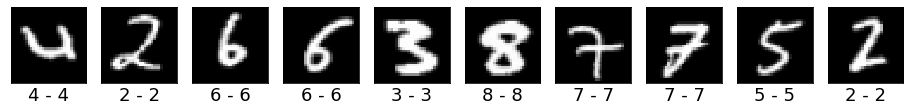

In [ ]:
import random
def visualize_predictions(model, dataloader, device):
    data, labels = next(iter(dataloader))
    data_labels = random.choices(list(zip(data, labels)), k=10)
    
    data = torch.stack([x[0] for x in data_labels])
    labels = torch.stack([x[1] for x in data_labels])
    data, labels = data.to(device), labels.to(device)
    predictions = model(data).max(1)[1]
    
    predictions, data = predictions.cpu(), data.cpu()
    
    plt.figure(figsize=(16,9))
    for i in range(10):
        img = data.squeeze(1)[i]
        plt.subplot(1, 10, i+1)
        plt.imshow(img, cmap="gray", interpolation="none")
        plt.xlabel(f'{predictions[i].item()} - {labels[i].item()}', fontsize=18)
        plt.xticks([])
        plt.yticks([])    

print("hyp - gt")
visualize_predictions(conv_net, test_loader, device)

### Visualizando filtros CNN

En la siguiente imagen se muestra una de las posibles formas en que la red estaría aprendiendo cada kernel.


![](https://www.prhlt.upv.es/~jprieto/APR/figures/MNIST/mnist.png)

A continuación se muestra una imagen en la que se muestran algunos filtros aprendidos en modelo de red neuronal más grande y con otro dataset de entrada, ImageNet, las cuales ya son a RGB y con un tamaño de 224x244.
A la izquierda se ven algunos de los filtros mientras que a la derecha las imágenes de entrada sobre las que se han aplicado ya dichos filtros.

Extraído de: 

Zeiler M.D., Fergus R. (2014) Visualizing and Understanding Convolutional Networks. In: Fleet D., Pajdla T., Schiele B., Tuytelaars T. (eds) Computer Vision – ECCV 2014. ECCV 2014. Lecture Notes in Computer Science, vol 8689. Springer, Cham. https://doi.org/10.1007/978-3-319-10590-1_53


![](https://www.prhlt.upv.es/~jprieto/APR/figures/convs/filtro1.png)

#Transfer learning

El Transfer Learning es el uso de un modelo pre-entrenado, o parte de este, en una nueva tarea. Normalmente, la tarea en la que se ha entrenado originalmente el modelo es similar a la que tenemos como objetivo.
Por ejemplo, si tenemos un modelo que ha aprendido a detectar gatos en imágenes, probablemente le sea más fácil aprender después a detectar también perros u otros animales que entrenándolo desde cero.
Esto, además, permite ahorrar mucho cómputo y la necesidad de tener muchos miles de datos para entrenar.

Cuando hacemos transfer learning tenemos varias opciones. Podemos cargar todo el modelo y reiniciar solo la última capa, donde la salida son las clases.
Pero también podemos seleccionar, por ejemplo, las N primeras capas, donde creemos que se están aprendiendo las características más básicas.

Sobre los pesos cargados también podemos hacer "fine tuning", es decir, un refinamiento de los pesos al entrenar, mucho más ligero de lo que se haría de normal. Esto significa modificar el factor de aprendizaje (learning rate) a uno mucho más bajo, haciendo así que los pesos cargados no varien mucho de los originales.

Otra opción es dejarlos congelados, sin modificar, actuando así como extractor de características "ya aprendido".

![](https://www.prhlt.upv.es/~jprieto/APR/figures/tf/transfer_learning_general.png)

In [ ]:
plt.ion()   # interactive mode
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

Cargamos datos

In [ ]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

--2021-11-16 14:38:45--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 54.230.85.72, 54.230.85.108, 54.230.85.47, ...
Connecting to download.pytorch.org (download.pytorch.org)|54.230.85.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  64.4MB/s    in 0.7s    

2021-11-16 14:38:46 (64.4 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/t

In [ ]:
# Data augmentation y normalizazñon para entrenar
# Solo normalización para entrenar. 
# Recurso útil para entender la normalización de la entrada en imágenes y como calcularla: https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


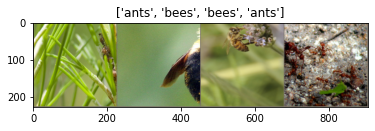

In [ ]:
# Escogemos algunos datos
inputs, classes = next(iter(dataloaders['train']))

# hacemos un grid gracias a una función de torchvision
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Definimos una función para entrenar

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    mejor_modelo = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        model.train()  # Modo entrenar

        running_loss = 0.0
        running_corrects = 0

        # Iteramos
        for inputs, labels in dataloaders['train']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Eliminamos la posible acumulación de gradientes
            optimizer.zero_grad()

            # forward
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward y optimizamos pesos
                loss.backward()
                optimizer.step()

                # guardamos estadísticas
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
        # Le indicamos al scheduler que hemos hecho una epoch
        scheduler.step()

        epoch_loss = running_loss / dataset_sizes['train']
        epoch_acc = running_corrects.double() / dataset_sizes['train']

        

        # copiamos los pesos del modelo en caso de haber mejorado algo
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            mejor_modelo = copy.deepcopy(model.state_dict())

        print('Train Loss: {:.4f} Acc: {:.4f}'.format(
                epoch_loss, epoch_acc))

    time_elapsed = time.time() - since
    print('Entrenamiento completado en in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    
    # load best model weights
    model.load_state_dict(mejor_modelo)
    model.eval()   # Modo validación

    running_loss = 0.0
    running_corrects = 0

    # Iteramos en validación
    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # forward
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        # guardamos estadísticas
        running_corrects += torch.sum(preds == labels.data)
    test_acc = running_corrects.double() / dataset_sizes['val']
    print('Test Acc: {:4f}'.format(test_acc))


    return model

Otra función para, más tarde, visualizar los resultados del modelo

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {} gt: {}'.format(class_names[preds[j]], class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### Vamos a utilizar la arquitectura ResNet-18 entrenada con ImageNet.
![](https://raw.githubusercontent.com/theevann/webconf-pytorch-workshop/master/figures/resnet.png)

ResNet es una arquitectura convolucional la cual tiene una serie de conexiones residuales, tal y como se muestra en la imagen. Ha sido pre-entrenada con ImageNet, un conjunto para clasificación de imagenes con 1.2 millones de imágenes y 1000 categorias.

En a la libreria **torchvision** podemos encontrar este conjunto de datos y similares. También podemos cargar algunos modelos pre-entrenados como el que usaremos a continuación

Cargamos el modelo pre-entrenado y reiniciamos la capa de clasificación.

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Dado que hay dos clases, ponemos la ultima capa con dos salidas.
# Es decir, modificamos la del modelo original.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# TODOS los parámetros se van a actualizar
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Bajamos el learning rate (factor de aprendizaje) multplicándolo por 0.1 cada 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Entrenamos

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Loss: 0.6175 Acc: 0.6885
Epoch 1/24
----------
Train Loss: 0.4698 Acc: 0.8033
Epoch 2/24
----------
Train Loss: 0.4433 Acc: 0.8156
Epoch 3/24
----------
Train Loss: 0.4339 Acc: 0.8074
Epoch 4/24
----------
Train Loss: 0.4293 Acc: 0.8074
Epoch 5/24
----------
Train Loss: 0.5176 Acc: 0.8156
Epoch 6/24
----------
Train Loss: 0.4387 Acc: 0.8238
Epoch 7/24
----------
Train Loss: 0.3415 Acc: 0.8648
Epoch 8/24
----------
Train Loss: 0.4094 Acc: 0.8238
Epoch 9/24
----------
Train Loss: 0.3807 Acc: 0.8443
Epoch 10/24
----------
Train Loss: 0.3790 Acc: 0.8320
Epoch 11/24
----------
Train Loss: 0.3435 Acc: 0.8648
Epoch 12/24
----------
Train Loss: 0.3382 Acc: 0.8566
Epoch 13/24
----------
Train Loss: 0.2776 Acc: 0.8811
Epoch 14/24
----------
Train Loss: 0.3459 Acc: 0.8402
Epoch 15/24
----------
Train Loss: 0.3068 Acc: 0.8607
Epoch 16/24
----------
Train Loss: 0.2755 Acc: 0.8730
Epoch 17/24
----------
Train Loss: 0.3059 Acc: 0.8689
Epoch 18/24
----------
Train Loss: 0.3147 Acc: 0.8443
Epoch 

Visualizamos algunos de los resultados

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


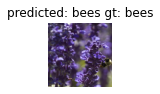

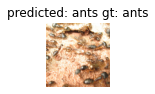

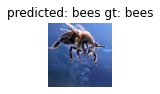

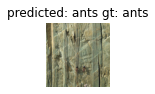

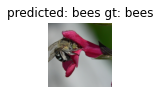

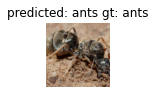

In [ ]:
visualize_model(model_ft)

plt.ioff()
plt.show()

Podemos comparar los resultados con el modelo sin pre-entrenar

In [ ]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Loss: 0.8880 Acc: 0.4631
Epoch 1/24
----------
Train Loss: 0.7890 Acc: 0.5328
Epoch 2/24
----------
Train Loss: 0.7534 Acc: 0.6025
Epoch 3/24
----------
Train Loss: 0.6751 Acc: 0.6311
Epoch 4/24
----------
Train Loss: 0.7490 Acc: 0.5779
Epoch 5/24
----------
Train Loss: 0.7859 Acc: 0.5369
Epoch 6/24
----------
Train Loss: 0.6510 Acc: 0.6475
Epoch 7/24
----------
Train Loss: 0.6648 Acc: 0.6598
Epoch 8/24
----------
Train Loss: 0.5739 Acc: 0.7418
Epoch 9/24
----------
Train Loss: 0.5874 Acc: 0.6926
Epoch 10/24
----------
Train Loss: 0.5721 Acc: 0.6844
Epoch 11/24
----------
Train Loss: 0.5934 Acc: 0.6721
Epoch 12/24
----------
Train Loss: 0.5827 Acc: 0.6967
Epoch 13/24
----------
Train Loss: 0.5834 Acc: 0.6926
Epoch 14/24
----------
Train Loss: 0.5617 Acc: 0.7377
Epoch 15/24
----------
Train Loss: 0.5981 Acc: 0.6598
Epoch 16/24
----------
Train Loss: 0.5568 Acc: 0.7172
Epoch 17/24
----------
Train Loss: 0.5537 Acc: 0.7254
Epoch 18/24
----------
Train Loss: 0.5983 Acc: 0.6639
Epoch 